# Unsupervised Learning - Lab - No Code
## Clustering Analysis with k-means

https://shorturl.at/mCRX2

## Overview

- [Dataset loading and exploration](#Dataset-loading-and-exploration)
- [Using the elbow method to find the optimal number of clusters](#Using-the-elbow-method-to-find-the-optimal-number-of-clusters)
- [Cluster with the optimal number](#Cluster-with-the-optimal-number)
- [Quantifying the quality of clustering via silhouette plots](#Quantifying-the-quality-of-clustering-via-silhouette-plots)
- [Comparison to bad clustering](#Comparison-to-bad-clustering)

In [ ]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

%matplotlib inline

rnd_state = 42 # This variable will be used in all the procedure calls allowing a random_state parameter
               # in this way the running can be perfectly reproduced
               # just change this value for a different experiment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Dataset loading and exploration

In [ ]:
# load the data file 'ex1_4dim_data.csv'



In [ ]:
# chek the shape and plot the first lines in the dataframe



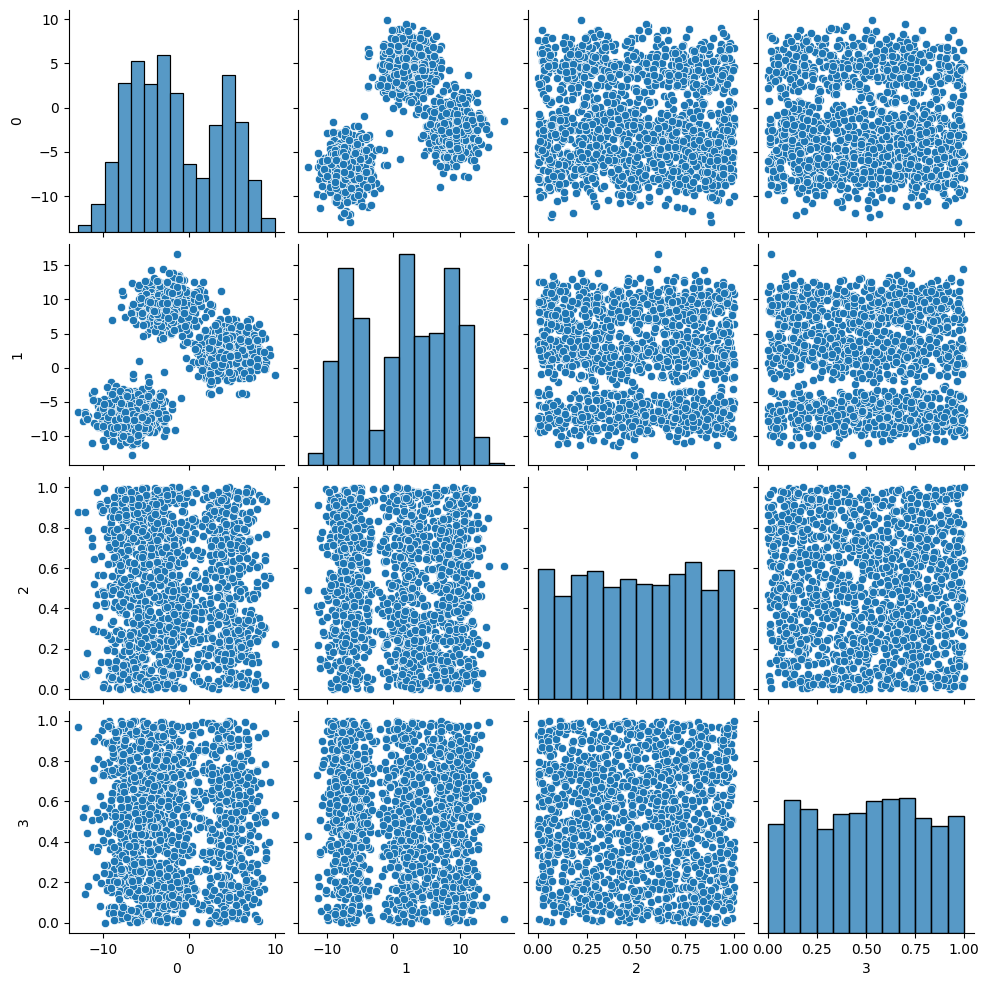

In [ ]:
# observe the plot and decide which are the most interesting columns to use in the plots of the clusters
# (hint: use pairplot from seaborn library)



In this simple example, the two most interesting columns are `0` and `1`.

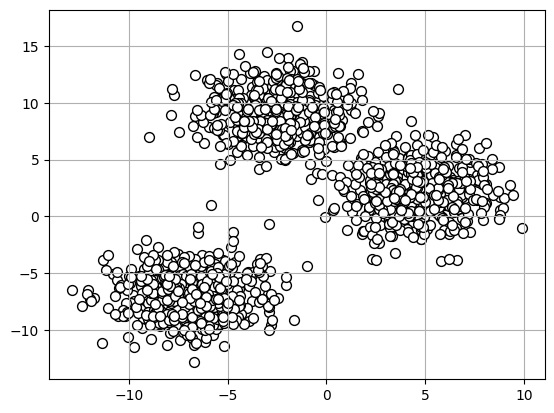

In [ ]:
# dataset projection on the 2d-space of the two main features determined above

focus = [0,1]
plt.scatter(df.to_numpy()[:,focus[0]], df.to_numpy()[:,focus[1]]
            , c='white'          # color filling the data markers
            , edgecolors='black' # edge color for data markers
            , marker='o'         # data marker shape, e.g. triangles (v<>^), square (s), star (*), ...
            , s=50)              # data marker size
plt.grid()  # plots a grid on the data
plt.show()

We define a function to plot clusters, below the code and its explanation using the help function.

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

def plot_clusters(X, y, dim, points,
                  labels_prefix = 'cluster',
                  points_name = 'centroids',
                  colors = cm.tab10, # a qualitative map
                      # https://matplotlib.org/examples/color/colormaps_reference.html
#                   colors = ['brown', 'orange', 'olive',
#                             'green', 'cyan', 'blue',
#                             'purple', 'pink'],
#                   points_color = 'red'
                  points_color = cm.tab10(10) # by default the last of the map (to be improved)
                 ):
    """
    Plot a two dimensional projection of an array of labelled points
    X:      array with at least two columns
    y:      vector of labels, length as number of rows in X
    dim:    the two columns to project, inside range of X columns, e.g. (0,1)
    points: additional points to plot as 'stars'
    labels_prefix: prefix to the labels for the legend ['cluster']
    points_name:   legend name for the additional points ['centroids']
    colors: a color map
    points_color: the color for the points
    """
    # plot the labelled (colored) dataset and the points
    labels = np.unique(y)
    for i in range(len(labels)):
        color = colors(i / len(labels)) # choose a color from the map
        plt.scatter(X[y==labels[i],dim[0]],
                    X[y==labels[i],dim[1]],
                    s=10,
                    c = [color], # scatter requires a sequence of colors
                    marker='s',
                    label=labels_prefix+str(labels[i]))
    plt.scatter(points[:,dim[0]],
                points[:,dim[1]],
                s=50,
                marker='*',
                c=[points_color],
                label=points_name)
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
help(plot_clusters)

Help on function plot_clusters in module __main__:

plot_clusters(X, y, dim, points, labels_prefix='cluster', points_name='centroids', colors=<matplotlib.colors.ListedColormap object at 0x7dc090ea33a0>, points_color=(0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0))
    Plot a two dimensional projection of an array of labelled points
    X:      array with at least two columns
    y:      vector of labels, length as number of rows in X
    dim:    the two columns to project, inside range of X columns, e.g. (0,1)
    points: additional points to plot as 'stars'
    labels_prefix: prefix to the labels for the legend ['cluster']
    points_name:   legend name for the additional points ['centroids']
    colors: a color map
    points_color: the color for the points



## Using the elbow method to find the optimal number of clusters



In [ ]:
# Define the range for the number of cluster from 2 to 10


For each value of the number of clusters:  
- initialize an estimator for `KMeans` and `fit_predict`
- we will store the distortion (from the fitted model) in the variable `distortions`
- using the function `silhouette_score` from `sklearn.metrics` with arguments the data and the fitted labels, we will fill the variable `silhouette_scores`

In [ ]:
# initialize two lists where saving ditortions and silhuouette scores for different value of k

distortions = []
silhouette_scores = []

In [ ]:
# for the range of k define before, fit_predict kmeans and update distortions and silhouette_scores



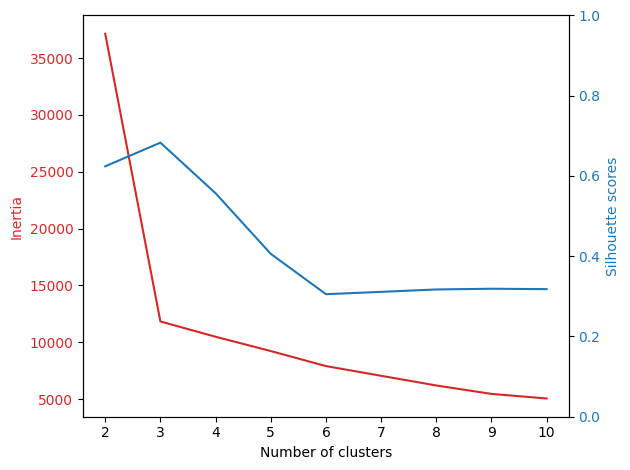

In [ ]:
# plot inertia and silhouette

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color=color)
ax1.plot(k_range, distortions, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Silhouette scores', color=color)  # we already handled the x-label with ax1
ax2.plot(k_range, silhouette_scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0,1) # the axis for silhouette is [0,1]

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Which is the optimal number of cluster?

## Cluster with the optimal number

In [ ]:
# set the optimal number of cluster



In [ ]:
# fit_predict k-means with the selected k



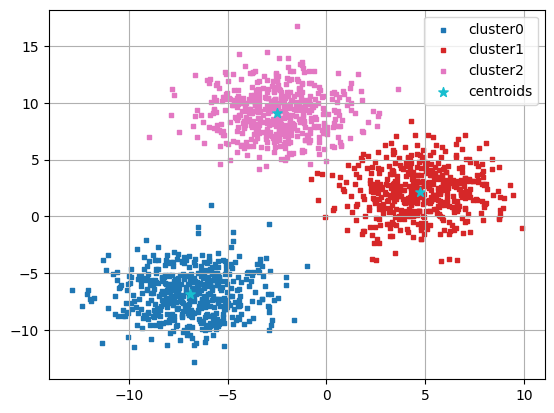

In [ ]:
# plot the clusters highlighting their centroids


In [ ]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 11831.85


## Quantifying the quality of clustering  via silhouette plots


The silhouette scores for the individual samples are computed with the function `silhouette_samples`

The function `plot_silhouette` produces a 'horizontal bar-plot', with one bar for each sample, where the length of the bar is proportional to the silhouette score of the sample. The bars are grouped for cluster and sorted for decreasing length.

A vertical line represents the silhouette score, i.e. the average on all the samples,

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def plot_silhouette(silhouette_vals, y,
 					colors = cm.tab10
					):
    """
    Plotting silhouette scores for the individual samples of a labelled data set.
    The scores will be grouped according to labels and sorted in descending order.
    The bars are proportional to the score and the color is determined by the label.

    silhouette_vals: the silhouette values of the samples
    y:               the labels of the samples

    """
    cluster_labels = np.unique(y)
    n_clusters = len(cluster_labels)
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels): # generate pairs index, cluster_label
        c_silhouette_vals = silhouette_vals[y==c] # extracts records with the current cluster label
        c_silhouette_vals.sort() # sort the silhouette vals for the current class
        y_ax_upper += len(c_silhouette_vals)
        color = colors(i / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
                edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, cluster_labels)# + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.tight_layout()
    # plt.savefig('./figures/silhouette.png', dpi=300)
    plt.show()

In [ ]:
help(plot_silhouette)

Help on function plot_silhouette in module __main__:

plot_silhouette(silhouette_vals, y, colors=<matplotlib.colors.ListedColormap object at 0x7dc090ea33a0>)
    Plotting silhouette scores for the individual samples of a labelled data set.
    The scores will be grouped according to labels and sorted in descending order.
    The bars are proportional to the score and the color is determined by the label.
    
    silhouette_vals: the silhouette values of the samples
    y:               the labels of the samples



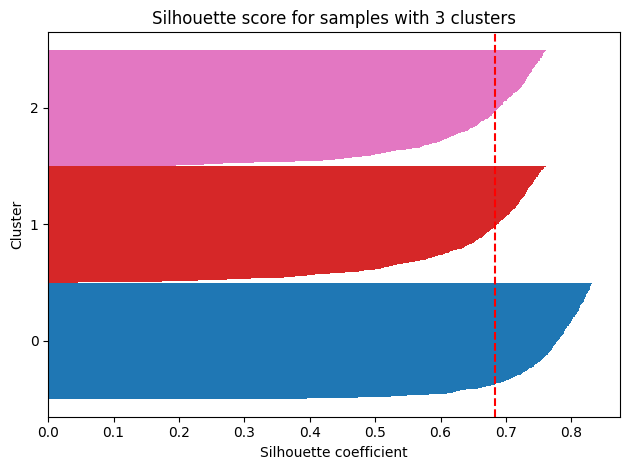

In [ ]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0] # it is the number of rows

# Compute the Silhouette Coefficient for each sample, with the euclidean metric
silhouette_score_samples = silhouette_samples(df, y_km, metric='euclidean')

#m Plot the Silhouette score
plt.title('Silhouette score for samples with {} clusters'.format(good_k))
plot_silhouette(silhouette_score_samples, y_km)

## Comparison to bad clustering

Do the same of the previous notebook section choosing a non-optimal number of cluster

In [ ]:
# set k



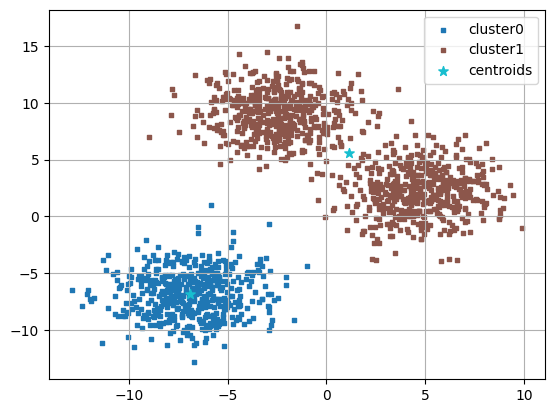

In [ ]:
# fit_predict k-means



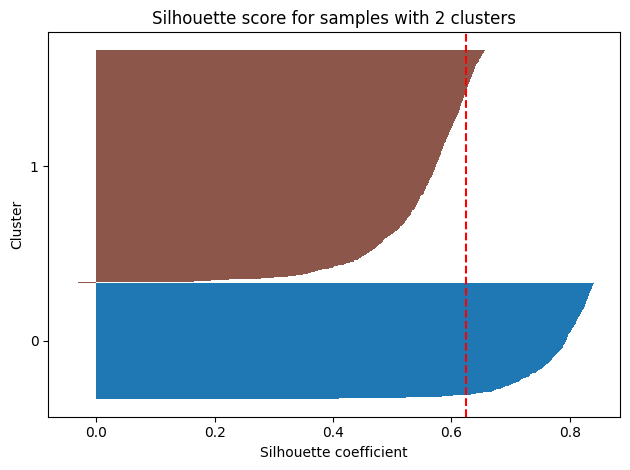

In [ ]:
# compute the silhouette_score and plot the results in a diagram